In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [3]:
# 数据集为CCPP,发电厂数据
data=pd.DataFrame(pd.read_excel('/Users/miya/PycharmProjects/miya/Dataset/power_plant.xlsx'))
print(data)

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
5     26.27  59.44  1012.23  58.77  443.67
6     15.89  43.96  1014.02  75.24  467.35
7      9.48  44.71  1019.12  66.43  478.42
8     14.64  45.00  1021.78  41.25  475.98
9     11.74  43.56  1015.14  70.72  477.50
10    17.99  43.72  1008.64  75.04  453.02
11    20.14  46.93  1014.66  64.22  453.99
12    24.34  73.50  1011.31  84.15  440.29
13    25.71  58.59  1012.77  61.83  451.28
14    26.19  69.34  1009.48  87.59  433.99
15    21.42  43.79  1015.76  43.08  462.19
16    18.21  45.00  1022.86  48.84  467.54
17    11.04  41.74  1022.60  77.51  477.20
18    14.45  52.75  1023.97  63.59  459.85
19    13.97  38.47  1015.15  55.28  464.30
20    17.76  42.42  1009.09  66.26  468.27
21     5.41  40.07  1019.16  64.77  495.24
22     7.76

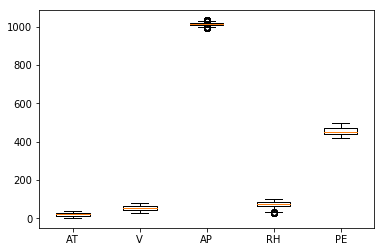

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


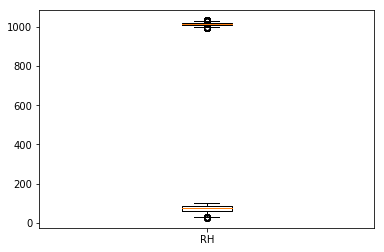

      AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90


In [4]:
# 全部特征箱形图
plt.boxplot(x=data.values,labels=data.columns,whis=1.5)
plt.show()
data.head()
print(data.head())

# 单个特征箱型图
plt.boxplot(x=data['AP'].values,labels=['AP'],whis=1.5)
plt.boxplot(x=data['RH'].values,labels=['RH'],whis=1.5)

plt.show()
data.head()
print(data.head())

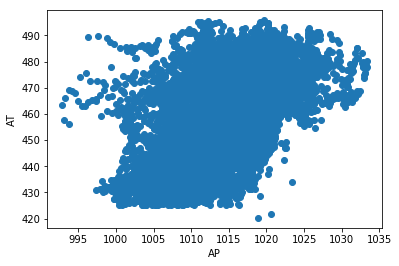

In [5]:
# 异常值处理、绘制散点图
data = data.T#转置
x = data.values[2]
y = data.values[4]

plt.plot(x,y,'o')
plt.xlabel("AP")
plt.ylabel("AT")

plt.show()

In [20]:
data=data.T

In [21]:
# 处理异常值
# 打印出符合条件的值得个数
print(len(data[data.AP>1029]))
print(len(data[data.AP<996]))
print(len(data[data.RH<31]))

83
11
12


In [23]:
# 直接删除符合条件的值
# 先赋值为空
data[data.AP>1029]=None
data[data.AP<996]=None
data[data.RH<31]=None
# 再进行删除
data=data.dropna()

In [24]:
# 检查符合条件的数据行是否还存在
print(len(data[data.AP>1029]))
print(len(data[data.AP<996]))
print(len(data[data.RH<31]))

0
0
0


In [25]:
# 以均值替代
data[data['RH']<31]=data['RH'].mean()
data[data['AP']<996]=data['AP'].mean()
data[data['AP']>1029]=data['AP'].mean()

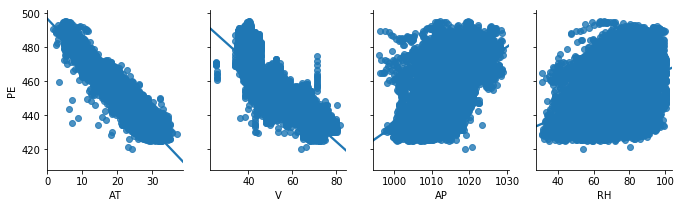

In [26]:
# 分析各个特征向量
import seaborn as sns
sns.pairplot(data, x_vars=['AT', 'V', 'AP','RH'], y_vars='PE', size=3, aspect=0.8,kind='reg')
plt.show()

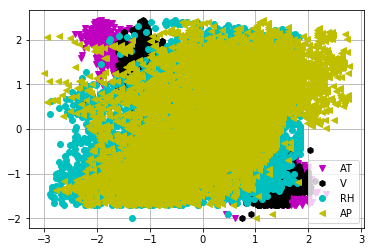

         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
5     26.27  59.44  1012.23  58.77  443.67
6     15.89  43.96  1014.02  75.24  467.35
7      9.48  44.71  1019.12  66.43  478.42
8     14.64  45.00  1021.78  41.25  475.98
9     11.74  43.56  1015.14  70.72  477.50
10    17.99  43.72  1008.64  75.04  453.02
11    20.14  46.93  1014.66  64.22  453.99
12    24.34  73.50  1011.31  84.15  440.29
13    25.71  58.59  1012.77  61.83  451.28
14    26.19  69.34  1009.48  87.59  433.99
15    21.42  43.79  1015.76  43.08  462.19
16    18.21  45.00  1022.86  48.84  467.54
17    11.04  41.74  1022.60  77.51  477.20
18    14.45  52.75  1023.97  63.59  459.85
19    13.97  38.47  1015.15  55.28  464.30
20    17.76  42.42  1009.09  66.26  468.27
21     5.41  40.07  1019.16  64.77  495.24
22     7.76

In [27]:
# 标准化后进行分析
data_zs = 1.0 * (data - data.mean()) / data.std()  # 数据标准化
x=data_zs[['AT', 'V','RH','AP']]
y= data_zs['PE']
plt.plot(data_zs['AT'],y,'mv',label='AT' )
plt.plot(data_zs['V'],y,'kh',label='V' )
plt.plot(data_zs['RH'],y,'co',label='RH' )
plt.plot(data_zs['AP'],y,'y<',label='AP' )
plt.legend(loc='lower right')
plt.grid()
plt.show()
print(data)

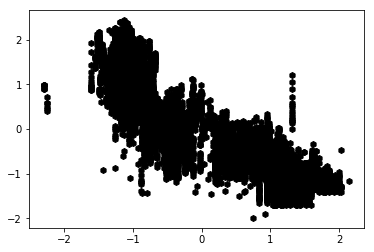

In [28]:
plt.plot(data_zs['V'],y,'kh',label='V' )

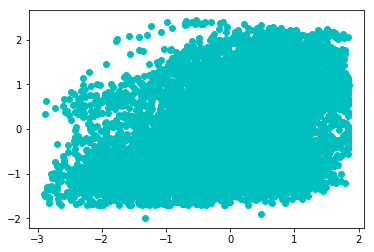

In [29]:
plt.plot(data_zs['RH'],y,'co',label='RH' )

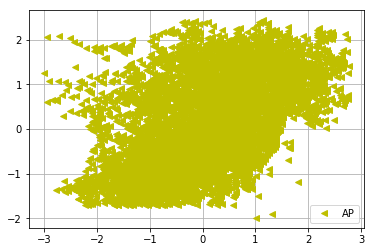

In [31]:
plt.plot(data_zs['AP'],y,'y<',label='AP' )
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [32]:
# 划分测试集、训练集
from sklearn.cross_validation import train_test_split
X = data[['AT','V','AP','RH']]
Y = data[['PE']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.4, random_state=1)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [33]:
# 线性规划
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, Y_train)
print(linreg.intercept_)
print(linreg.coef_)
y_pred=linreg.predict(X_test)

[445.35907985]
[[-1.99266307 -0.22627567  0.07124649 -0.16018131]]


In [34]:
# 模型拟合测试集
y_pred = linreg.predict(X_test)
from sklearn import metrics
# 用scikit-learn计算MSE
print ("MSE:",metrics.mean_squared_error(Y_test, y_pred))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

MSE: 21.506098377608513
RMSE: 4.637466806092364


In [35]:
# 评估MSE\RMSE
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, Y, cv=10)
# 用scikit-learn计算MSE
print( "MSE:",metrics.mean_squared_error(Y, predicted))
# 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(Y, predicted)))

MSE: 20.881163300615956
RMSE: 4.569591152457291


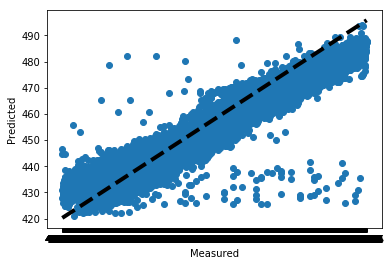

In [36]:
# 这里画图真实值和预测值的变化关系，离中间的直线y=x直接越近的点代表预测损失越低
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, Y, cv=10)
plt.scatter(Y, predicted)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

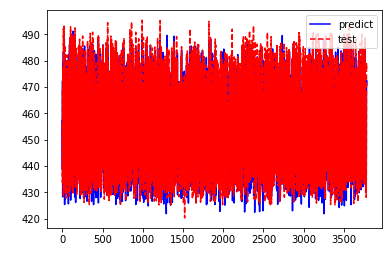

In [37]:
#ROC曲线（描绘预测值和测试值）
y_pred=linreg.predict(X_test)
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),Y_test,'r--',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel(" ")
plt.ylabel(' ')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:753: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:753: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:753: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

MSE: 10.792559044338399
RMSE: 3.2852030446135894


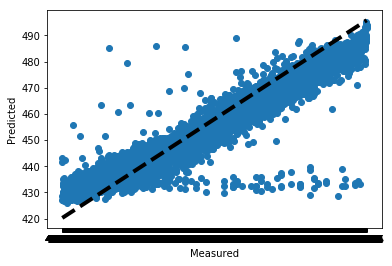

特征重要度：
[0.91150029 0.05276986 0.01830323 0.01742661]


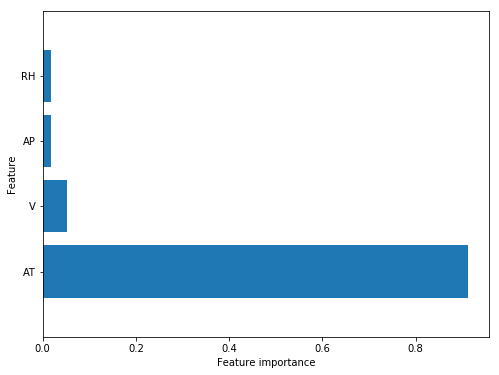

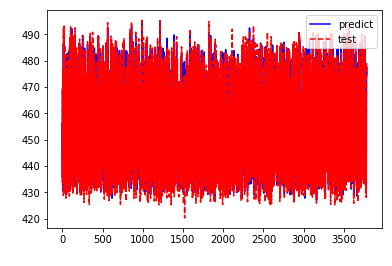

In [38]:
# 随机森林（回归）
from sklearn.ensemble import RandomForestRegressor
# maxdepth参数影响很大，同时需要关注n_estimators=
rf= RandomForestRegressor(max_depth=None,n_estimators=100,random_state=0)
rf.fit(X_train,Y_train)
#
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(rf, X, Y, cv=10)
# # 用scikit-learn计算MSE
print( "MSE:",metrics.mean_squared_error(Y, predicted))
# # 用scikit-learn计算RMSE
print ("RMSE:",np.sqrt(metrics.mean_squared_error(Y, predicted)))

# 这里画图真实值和预测值的变化关系，离中间的直线y=x直接越近的点代表预测损失越低
fig, ax = plt.subplots()
ax.scatter(Y, predicted)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

# 特征重要程度
print("特征重要度：\n{}".format(rf.feature_importances_))
ccpp_features=[x for i,x in enumerate(data.columns) if i !=4]
def plot_feature_importances_CCPP(model):
    plt.figure(figsize=(8,6))
    n_features=4
    plt.barh(range(n_features), model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features), ccpp_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)
plot_feature_importances_CCPP(rf)
plt.show()

# ROC曲线
y_pred=rf.predict(X_test)
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),Y_test,'r--',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel(" ")
plt.ylabel(' ')
plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

MSE: 12.118266958697106
RMSE: 3.481130126653858


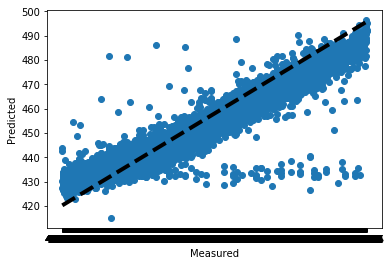

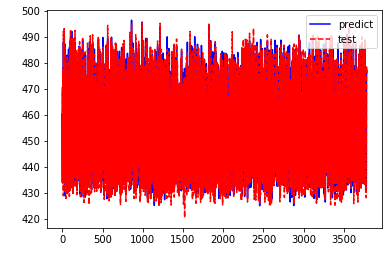

In [40]:
# 梯度提升（回归）
from sklearn.ensemble import GradientBoostingRegressor
# gb=GradientBoostingRegressor(random_state=0)
# 参数调整
# gb=GradientBoostingRegressor(random_state=0,max_depth=1)
gb=GradientBoostingRegressor(random_state=0,learning_rate=0.7)
gb.fit(X_train,Y_train)
#特征重要程度
# plot_feature_importances_CCPP(gb)
# plt.show()

# # 用scikit-learn计算MSE、RMSE
predicted = cross_val_predict(gb, X, Y, cv=10)
print( "MSE:",metrics.mean_squared_error(Y, predicted))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(Y, predicted)))

# 这里画图真实值和预测值的变化关系，离中间的直线y=x直接越近的点代表预测损失越低
plt.scatter(Y, predicted)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()

# ROC曲线，红色的线是真实的值曲线，蓝色的是预测值曲线
y_pred=gb.predict(X_test)
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),Y_test,'r--',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel(" ")
plt.ylabel(' ')
plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d

MSE: 17.914224034453717
RMSE: 4.232519820916816


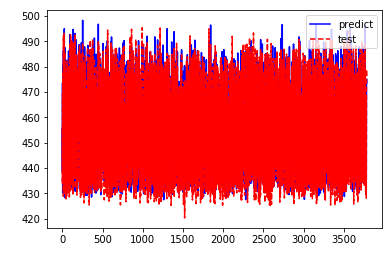

In [41]:
# # 深度学习
from sklearn.neural_network import MLPRegressor
# 数据规范化
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X=scaler.fit_transform(X)
X_train_scaled =scaler.fit_transform(X_train)
X_test_scaled =scaler.fit_transform(X_test)

# mlp =MLPRegressor(random_state=42)
# 调整参数
mlp =MLPRegressor(max_iter=10000,random_state=20)

mlp.fit(X_train_scaled,Y_train)

# MSE、RMSE评估
predicted = cross_val_predict(mlp, X, Y, cv=10)
print( "MSE:",metrics.mean_squared_error(Y, predicted))
print ("RMSE:",np.sqrt(metrics.mean_squared_error(Y, predicted)))
# ROC曲线
y_pred=mlp.predict(X_test_scaled)
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),Y_test,'r--',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel(" ")
plt.ylabel(' ')
plt.show()